In [1]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('SKX.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [3]:
# Tách dữ liệu thành tập train và test (tỉ lệ 9:1)
train_len = int(len(data) * 0.9)
train, test = data[:train_len], data[train_len:]

In [4]:
# Xây dựng mô hình VAR
model = VAR(train)
model_fitted = model.fit()

D:\angcoda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [5]:
# Dự đoán trên tập test
forecast = model_fitted.forecast(train.values[-model_fitted.k_ar:], steps=len(test))
forecast_30 = model_fitted.forecast(train.values[-model_fitted.k_ar:], steps=30)

In [6]:
# Tính toán độ đo đánh giá
mae = mean_absolute_error(test['Close'], forecast[:, 0])
mse = mean_squared_error(test['Close'], forecast[:, 0])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Close'] - forecast[:, 0]) / test['Close'])) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 7.9383501313771445
Mean Squared Error (MSE): 70.43790251324053
Root Mean Squared Error (RMSE): 8.39272914570943
Mean Absolute Percentage Error (MAPE): 15.514796986149781


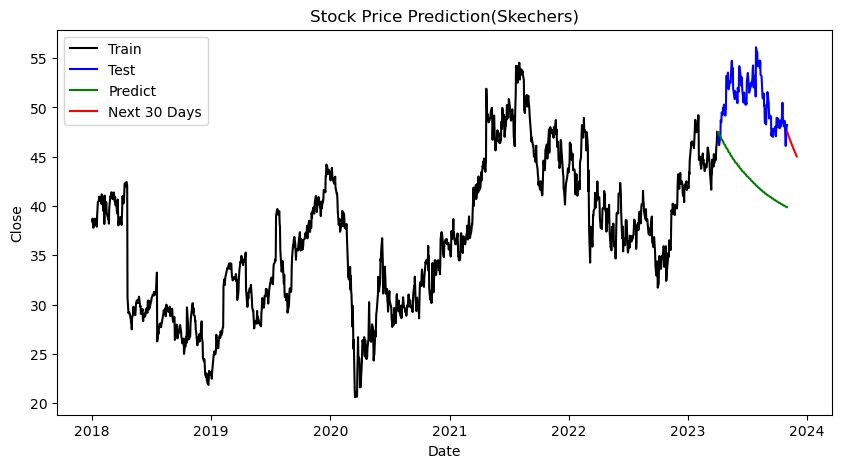

In [8]:
# Tạo biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Close'], label='Train', color='black')
plt.plot(test.index, test['Close'], label='Test', color='blue')
plt.plot(test.index, forecast[:, 0], label='Predict', color='green')
plt.plot(pd.date_range(start=test.index[-1], periods=31)[1:], forecast_30[:, 0], label='Next 30 Days', color='red')

plt.title('Stock Price Prediction(Skechers)')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()